In [2]:
#Importo las librerias necesarias

import requests as re
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from meli import Meli
import pickle
import plotly.express as px

In [4]:
meli = Meli(client_id=118333455072587, client_secret='NXF9LNK7niYWCUiyzjZK0i5hboZsCgSn')
redirectUrl = meli.auth_url(redirect_URI="http://localhost:8888/notebooks/Documents/BD/CHALLENGES/MELI/challenge_products.ipynb")

In [7]:
redirectUrl

'https://auth.mercadolibre.com.ar/authorization?client_id=118333455072587&response_type=code&redirect_uri=http%3A%2F%2Flocalhost%3A8888%2Fnotebooks%2FDocuments%2FBD%2FCHALLENGES%2FMELI%2Fchallenge_products.ipynb'

In [8]:
access_token = meli.authorize(code="TG-5ec9557a0767ea0006cae7bd-171271918"
               , redirect_URI="http://localhost:8888/notebooks/Documents/BD/CHALLENGES/MELI/challenge_products.ipynb")

In [9]:
meli.access_token

'APP_USR-118333455072587-052316-f59371b57de190272482c4f4ff2a12fe-171271918'

In [3]:
# Busco todas las categorias disponibles con sus codigos correspondientes
# La idea es poder usar el id de cada categoria para explorar los productos en cada una posteriormente
categories_url = 'https://api.mercadolibre.com/sites/MLA/categories'
r          = re.get(categories_url)
data       = json.loads(r.text)       # Convierto el JSON en un diccionario
categorias = pd.DataFrame(data)       # Listo todas las categorias posibles para buscarlas luego
categorias

id                           name
0     MLA5725      Accesorios para Vehículos
1     MLA1512                           Agro
2     MLA1403            Alimentos y Bebidas
3     MLA1071            Animales y Mascotas
4     MLA1367     Antigüedades y Colecciones
5     MLA1368      Arte, Librería y Mercería
6     MLA1743           Autos, Motos y Otros
7     MLA1384                          Bebés
8     MLA1246     Belleza y Cuidado Personal
9     MLA1039           Cámaras y Accesorios
10    MLA1051          Celulares y Teléfonos
11    MLA1648                    Computación
12    MLA1144         Consolas y Videojuegos
13    MLA1276             Deportes y Fitness
14    MLA5726  Electrodomésticos y Aires Ac.
15    MLA1000     Electrónica, Audio y Video
16    MLA2547          Entradas para Eventos
17  MLA407134    Herramientas y Construcción
18    MLA1574        Hogar, Muebles y Jardín
19    MLA1499          Industrias y Oficinas
20    MLA1459                      Inmuebles
21    MLA1182         Instrumentos Musicales
22    MLA3937                Joyas y Relojes
23    MLA1132              Juegos y Juguetes
24    MLA3025      Libros, Revistas y Comics
25    MLA1168     Música, Películas y Series
26    MLA1430              Ropa y Accesorios
27  MLA409431    Salud y Equipamiento Médico
28    MLA1540                      Servicios
29    MLA9304  Souvenirs, Cotillón y Fiestas
30    MLA1953               Otras categorías

In [29]:
# Voy a traerme la mayor cantidad de registros posibles para cada categoria. La idea es poder tener la mayor 
# cantidad de informacion de cada una de las categorias

# Para esto creo una lista vacia en la que se ira guardando los json obtenidos del GET
dataset = {}

# La API permite correr el offset hasta mil sin un ACCESS TOKEN. Uso el que me genere anteriormente
# para poder moverlo hasta 10000 y obtener aproximadamente 10000 registros por categoria
for categoria in categorias['id']:
    print(categoria)
    items = [] # Lista vacia
    for i in range(0,10000,50):
        print(i)
        url='https://api.mercadolibre.com/sites/MLA/search?category='
        url = url + categoria + '&offset=' + str(i) + '&access_token=' + meli.access_token
        json_data = re.get(url).json()
        if json_data['results'] != []:
            items = items + (json_data['results'])
    dataset[categoria] = items

MLA5725
0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
2150
2200
2250
2300
2350
2400
2450
2500
2550
2600
2650
2700
2750
2800
2850
2900
2950
3000
3050
3100
3150
3200
3250
3300
3350
3400
3450
3500
3550
3600
3650
3700
3750
3800
3850
3900
3950
4000
4050
4100
4150
4200
4250
4300
4350
4400
4450
4500
4550
4600
4650
4700
4750
4800
4850
4900
4950
5000
5050
5100
5150
5200
5250
5300
5350
5400
5450
5500
5550
5600
5650
5700
5750
5800
5850
5900
5950
6000
6050
6100
6150
6200
6250
6300
6350
6400
6450
6500
6550
6600
6650
6700
6750
6800
6850
6900
6950
7000
7050
7100
7150
7200
7250
7300
7350
7400
7450
7500
7550
7600
7650
7700
7750
7800
7850
7900
7950
8000
8050
8100
8150
8200
8250
8300
8350
8400
8450
8500
8550
8600
8650
8700
8750
8800
8850
8900
8950
9000
9050
9100
9150
9200
9250
9300
9350
9400
9450
9500
9550
9600
9650
9700
9750
9800
9850
9900
9950
MLA1512
0
50
10

3300
3350
3400
3450
3500
3550
3600
3650
3700
3750
3800
3850
3900
3950
4000
4050
4100
4150
4200
4250
4300
4350
4400
4450
4500
4550
4600
4650
4700
4750
4800
4850
4900
4950
5000
5050
5100
5150
5200
5250
5300
5350
5400
5450
5500
5550
5600
5650
5700
5750
5800
5850
5900
5950
6000
6050
6100
6150
6200
6250
6300
6350
6400
6450
6500
6550
6600
6650
6700
6750
6800
6850
6900
6950
7000
7050
7100
7150
7200
7250
7300
7350
7400
7450
7500
7550
7600
7650
7700
7750
7800
7850
7900
7950
8000
8050
8100
8150
8200
8250
8300
8350
8400
8450
8500
8550
8600
8650
8700
8750
8800
8850
8900
8950
9000
9050
9100
9150
9200
9250
9300
9350
9400
9450
9500
9550
9600
9650
9700
9750
9800
9850
9900
9950
MLA1039
0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
2150
2200
2250
2300
2350
2400
2450
2500
2550
2600
2650
2700
2750
2800
2850
2900
2950
3000
3050
3100
3150
3200
3250
3300
3350
3400


6450
6500
6550
6600
6650
6700
6750
6800
6850
6900
6950
7000
7050
7100
7150
7200
7250
7300
7350
7400
7450
7500
7550
7600
7650
7700
7750
7800
7850
7900
7950
8000
8050
8100
8150
8200
8250
8300
8350
8400
8450
8500
8550
8600
8650
8700
8750
8800
8850
8900
8950
9000
9050
9100
9150
9200
9250
9300
9350
9400
9450
9500
9550
9600
9650
9700
9750
9800
9850
9900
9950
MLA407134
0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
2150
2200
2250
2300
2350
2400
2450
2500
2550
2600
2650
2700
2750
2800
2850
2900
2950
3000
3050
3100
3150
3200
3250
3300
3350
3400
3450
3500
3550
3600
3650
3700
3750
3800
3850
3900
3950
4000
4050
4100
4150
4200
4250
4300
4350
4400
4450
4500
4550
4600
4650
4700
4750
4800
4850
4900
4950
5000
5050
5100
5150
5200
5250
5300
5350
5400
5450
5500
5550
5600
5650
5700
5750
5800
5850
5900
5950
6000
6050
6100
6150
6200
6250
6300
6350
6400
6450
6500
655

9600
9650
9700
9750
9800
9850
9900
9950
MLA1168
0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
2150
2200
2250
2300
2350
2400
2450
2500
2550
2600
2650
2700
2750
2800
2850
2900
2950
3000
3050
3100
3150
3200
3250
3300
3350
3400
3450
3500
3550
3600
3650
3700
3750
3800
3850
3900
3950
4000
4050
4100
4150
4200
4250
4300
4350
4400
4450
4500
4550
4600
4650
4700
4750
4800
4850
4900
4950
5000
5050
5100
5150
5200
5250
5300
5350
5400
5450
5500
5550
5600
5650
5700
5750
5800
5850
5900
5950
6000
6050
6100
6150
6200
6250
6300
6350
6400
6450
6500
6550
6600
6650
6700
6750
6800
6850
6900
6950
7000
7050
7100
7150
7200
7250
7300
7350
7400
7450
7500
7550
7600
7650
7700
7750
7800
7850
7900
7950
8000
8050
8100
8150
8200
8250
8300
8350
8400
8450
8500
8550
8600
8650
8700
8750
8800
8850
8900
8950
9000
9050
9100
9150
9200
9250
9300
9350
9400
9450
9500
9550
9600
9650
9700


In [32]:
# Guardo el listado de productos 

pickle.dump(dataset, open('products.sav', 'wb'))

In [114]:
# Creo los distintos dataframe para despues concatenarlos

df1=pd.DataFrame(dataset['MLA5725'])
df2=pd.DataFrame(dataset['MLA1512'])
df3=pd.DataFrame(dataset['MLA1403'])
df4=pd.DataFrame(dataset['MLA1071'])
df5=pd.DataFrame(dataset['MLA1367'])
df6=pd.DataFrame(dataset['MLA1368'])
df7=pd.DataFrame(dataset['MLA1743'])
df8=pd.DataFrame(dataset['MLA1384'])
df9=pd.DataFrame(dataset['MLA1246'])
df10=pd.DataFrame(dataset['MLA1039'])
df11=pd.DataFrame(dataset['MLA1051'])
df12=pd.DataFrame(dataset['MLA1648'])
df13=pd.DataFrame(dataset['MLA1144'])
df14=pd.DataFrame(dataset['MLA1276'])
df15=pd.DataFrame(dataset['MLA5726'])
df16=pd.DataFrame(dataset['MLA1000'])
df17=pd.DataFrame(dataset['MLA2547'])
df18=pd.DataFrame(dataset['MLA407134'])
df19=pd.DataFrame(dataset['MLA1574'])
df20=pd.DataFrame(dataset['MLA1499'])
df21=pd.DataFrame(dataset['MLA1459'])
df22=pd.DataFrame(dataset['MLA1182'])
df23=pd.DataFrame(dataset['MLA3937'])
df24=pd.DataFrame(dataset['MLA1132'])
df25=pd.DataFrame(dataset['MLA3025'])
df26=pd.DataFrame(dataset['MLA1168'])
df27=pd.DataFrame(dataset['MLA1430'])
df28=pd.DataFrame(dataset['MLA409431'])
df29=pd.DataFrame(dataset['MLA1540'])
df30=pd.DataFrame(dataset['MLA9304'])
df31=pd.DataFrame(dataset['MLA1953'])

df1['category'] ='Accesorios para Vehículos'
df2['category'] ='Agro'
df3['category'] ='Alimentos y Bebidas'
df4['category'] ='Animales y Mascotas'
df5['category'] ='Antigüedades y Colecciones'
df6['category'] ='Arte, Librería y Mercería'
df7['category'] ='Autos, Motos y Otros'
df8['category'] ='Bebés'
df9['category'] ='Belleza y Cuidado Personal'
df10['category'] ='Cámaras y Accesorios'
df11['category'] ='Celulares y Teléfonos'
df12['category'] ='Computación'
df13['category'] ='Consolas y Videojuegos'
df14['category'] ='Deportes y Fitness'
df15['category'] ='Electrodomésticos y Aires Ac.'
df16['category'] ='Electrónica, Audio y Video'
df17['category'] ='Entradas para Eventos'
df18['category'] ='Herramientas y Construcción'
df19['category'] ='Hogar, Muebles y Jardín'
df20['category'] ='Industrias y Oficinas'
df21['category'] ='Inmuebles'
df22['category'] ='Instrumentos Musicales'
df23['category'] ='Joyas y Relojes'
df24['category'] ='Juegos y Juguetes'
df25['category'] ='Libros, Revistas y Comics'
df26['category'] ='Música, Películas y Series'
df27['category'] ='Ropa y Accesorios'
df28['category'] ='Salud y Equipamiento Médico'
df29['category'] ='Servicios'
df30['category'] ='Souvenirs, Cotillón y Fiestas'
df31['category'] ='Otras categorías'

# Los coloco en una lista para concatenar 

frames = [df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19,df20,df21,
         df22,df23,df24,df25,df26,df27,df28,df29,df30,df31]

# Concateno

df_final = pd.concat(frames, ignore_index = True)

In [116]:
# Guardo el dataframes de productos 

pickle.dump(df_final, open('products_df.sav', 'wb'))

## Seleccion de variables finales 

In [3]:
df_final = pickle.load( open( "products_df.sav", "rb" ) )

Ya obtenidos todos los DataFrames (uno para cada categoria) y habiendolos juntados en uno solo, ahora es necesario encontrar los atributos de los productos que pueden ser relevantes para un analisis, pensando tambien en que puedan ser utilizados para el modelado.

In [4]:
pd.set_option('display.max_columns', None)
df_final.head()

id site_id                                              title  \
0  MLA853132370     MLA          Neumático Pirelli P400 Evo 175/65 R14 82h   
1  MLA843059508     MLA  Aspiradora Lüsqtoff La-1500mm 15l Negra Y Nara...   
2  MLA838981142     MLA               Estéreo Para Auto Pioneer Mvh S215bt   
3  MLA839994928     MLA          Estéreo Para Auto Pioneer Mvh 295bt Negro   
4  MLA852825738     MLA          Neumático Fate Maxisport 2 175/65 R14 82t   

                                              seller   price currency_id  \
0  {'id': 209395697, 'permalink': 'http://perfil....  5162.0         ARS   
1  {'id': 59359887, 'permalink': 'http://perfil.m...  5898.0         ARS   
2  {'id': 328024080, 'permalink': 'http://perfil....  6690.0         ARS   
3  {'id': 184851097, 'permalink': 'http://perfil....  7800.0         ARS   
4  {'id': 316121367, 'permalink': 'http://perfil....  4249.0         ARS   

   available_quantity  sold_quantity buying_mode listing_type_id  \
0                   1             25  buy_it_now        gold_pro   
1                  50             50  buy_it_now    gold_special   
2                   1            150  buy_it_now    gold_special   
3                  50             50  buy_it_now    gold_special   
4                   1              4  buy_it_now    gold_special   

                  stop_time condition  \
0  2040-04-28T04:00:00.000Z       new   
1  2040-03-05T04:00:00.000Z       new   
2  2040-02-08T04:00:00.000Z       new   
3  2040-03-04T20:00:07.000Z       new   
4  2040-04-27T04:00:00.000Z       new   

                                           permalink  \
0  https://www.mercadolibre.com.ar/neumatico-pire...   
1  https://www.mercadolibre.com.ar/aspiradora-lus...   
2  https://www.mercadolibre.com.ar/estereo-para-a...   
3  https://www.mercadolibre.com.ar/estereo-para-a...   
4  https://www.mercadolibre.com.ar/neumatico-fate...   

                                           thumbnail  accepts_mercadopago  \
0  http://mla-s1-p.mlstatic.com/638692-MLA3223854...                 True   
1  http://mla-s1-p.mlstatic.com/660894-MLA4042361...                 True   
2  http://mla-s1-p.mlstatic.com/960260-MLA3308273...                 True   
3  http://mla-s1-p.mlstatic.com/842858-MLA3308309...                 True   
4  http://mla-s1-p.mlstatic.com/891096-MLA3229822...                 True   

                                        installments  \
0  {'quantity': 18, 'amount': 286.78, 'rate': 0, ...   
1  {'quantity': 12, 'amount': 804.93, 'rate': 63....   
2  {'quantity': 12, 'amount': 913.02, 'rate': 63....   
3  {'quantity': 12, 'amount': 1064.51, 'rate': 63...   
4  {'quantity': 12, 'amount': 579.88, 'rate': 63....   

                                             address  \
0  {'state_id': 'AR-B', 'state_name': 'Buenos Air...   
1  {'state_id': 'AR-B', 'state_name': 'Buenos Air...   
2  {'state_id': 'AR-C', 'state_name': 'Capital Fe...   
3  {'state_id': 'AR-C', 'state_name': 'Capital Fe...   
4  {'state_id': 'AR-B', 'state_name': 'Buenos Air...   

                                            shipping  \
0  {'free_shipping': True, 'mode': 'me2', 'tags':...   
1  {'free_shipping': True, 'mode': 'me2', 'tags':...   
2  {'free_shipping': True, 'mode': 'me2', 'tags':...   
3  {'free_shipping': True, 'mode': 'me2', 'tags':...   
4  {'free_shipping': False, 'mode': 'not_specifie...   

                                      seller_address  \
0  {'id': '', 'comment': '', 'address_line': '', ...   
1  {'id': '', 'comment': '', 'address_line': '', ...   
2  {'id': '', 'comment': '', 'address_line': '', ...   
3  {'id': '', 'comment': '', 'address_line': '', ...   
4  {'id': '', 'comment': '', 'address_line': '', ...   

                                          attributes differential_pricing  \
0  [{'id': 'BRAND', 'value_id': '76026', 'attribu...     {'id': 33665186}   
1  [{'name': 'Marca', 'value_id': '112342', 'valu...                  NaN   
2  [{'source': 1, 'value_id': '9838', 'value_name...

A partir del category id se puede obtener la subcategoria a la que pertenece el producto. Esto lo podemos obtener con un *get* e indicando la category id buscada. 

Por eso voy a crear un conjunto de todas las categorias existentes en los datos y despues un diccionario con el id y la descripcion de la subcategoria correspondiente

In [216]:
# Creo un conjunto de las subcategorias

subcategories = set(df_final['category_id'])

subcat_dict = {}
for subcat in subcategories:
    url_categorias_hijo = 'https://api.mercadolibre.com/categories/'
    url_categorias_hijo = url_categorias_hijo + subcat
    r          = re.get(url_categorias_hijo)
    data       = json.loads(r.text)
    subcat_dict[subcat] = data['name']

In [217]:
# Guardo el diccionario

pickle.dump(subcat_dict, open('subcat_dict.sav', 'wb'))

In [6]:
subcat_dict = pickle.load( open( "subcat_dict.sav", "rb" ))

In [7]:
# Creo la columna con subcategorias
df_final['subcategory'] = df_final['category_id'].apply(lambda x: subcat_dict[x])

In [8]:
# Construyo las columnas que voy a usar en el analisis 

df_final['power_seller_status'] = df_final['seller'].apply(lambda x: x['power_seller_status'])
df_final['real_estate_agency']   = df_final['seller'].apply(lambda x: x['real_estate_agency'])
df_final['car_dealer']          = df_final['seller'].apply(lambda x: x['car_dealer'])
df_final['nick_name']           = df_final['seller'].apply(lambda x: x['eshop']['nick_name'] if 'eshop' in x.keys() else 'NA')
df_final['q_installments']      = df_final['installments'].apply(lambda x: x['quantity'] if x is not None else 'NA')
df_final['state_name']          = df_final['address'].apply(lambda x: x['state_name'])
df_final['city_name']           = df_final['address'].apply(lambda x: x['city_name'])
df_final['free_shipping']       = df_final['shipping'].apply(lambda x: x['free_shipping'])
df_final['logistic_type']       = df_final['shipping'].apply(lambda x: x['logistic_type'])
df_final['store_pick_up']       = df_final['shipping'].apply(lambda x: x['store_pick_up'])
df_final['brand']               = df_final['attributes'].apply(lambda x: x[0]['value_name'] if x != [] else 'NA')

In [9]:
# Descarto las columnas que no se van a usar en el analisis

df_final = df_final[['title','price','currency_id','available_quantity','sold_quantity','buying_mode'
                     ,'listing_type_id','condition','accepts_mercadopago','original_price','official_store_id'
                     ,'catalog_listing','category','location','sale_terms','subcategory','power_seller_status'
                     , 'real_estate_agency','car_dealer','nick_name','q_installments','state_name','city_name'
                     , 'free_shipping','logistic_type','store_pick_up','brand']]

In [10]:
df_final.head()

title   price currency_id  \
0          Neumático Pirelli P400 Evo 175/65 R14 82h  5162.0         ARS   
1  Aspiradora Lüsqtoff La-1500mm 15l Negra Y Nara...  5898.0         ARS   
2               Estéreo Para Auto Pioneer Mvh S215bt  6690.0         ARS   
3          Estéreo Para Auto Pioneer Mvh 295bt Negro  7800.0         ARS   
4          Neumático Fate Maxisport 2 175/65 R14 82t  4249.0         ARS   

   available_quantity  sold_quantity buying_mode listing_type_id condition  \
0                   1             25  buy_it_now        gold_pro       new   
1                  50             50  buy_it_now    gold_special       new   
2                   1            150  buy_it_now    gold_special       new   
3                  50             50  buy_it_now    gold_special       new   
4                   1              4  buy_it_now    gold_special       new   

   accepts_mercadopago original_price official_store_id catalog_listing  \
0                 True            NaN               NaN            True   
1                 True            NaN               NaN            True   
2                 True            NaN               NaN            True   
3                 True           9815               NaN            True   
4                 True            NaN               NaN            True   

                    category location sale_terms  \
0  Accesorios para Vehículos      NaN        NaN   
1  Accesorios para Vehículos      NaN        NaN   
2  Accesorios para Vehículos      NaN        NaN   
3  Accesorios para Vehículos      NaN        NaN   
4  Accesorios para Vehículos      NaN        NaN   

                      subcategory power_seller_status  real_estate_agency  \
0  Neumáticos de Auto y Camioneta            platinum               False   
1                     Aspiradoras            platinum               False   
2                        Estéreos                None               False   
3                        Estéreos            platinum               False   
4  Neumáticos de Auto y Camioneta                gold               False   

   car_dealer          nick_name q_installments       state_name  \
0       False  ALVAREZNEUMATICOS             18     Buenos Aires   
1       False    CASA-DEL-SONIDO             12     Buenos Aires   
2       False        TECNOWAYSRL             12  Capital Federal   
3       False        -AMERICARS-             12  Capital Federal   
4       False                 NA             12     Buenos Aires   

           city_name  free_shipping  logistic_type  store_pick_up     brand  
0       Bahía Blanca           True       drop_off          False   Pirelli  
1  General Rodríguez           True    fulfillment          False  Lüsqtoff  
2           Paternal           True    fulfillment          False   Pioneer  
3      San Cristobal           True  cross_docking          False   Pioneer  
4        Bella Vista          False  not_specified          False      Fate

# Exploratory Data Analysis (EDA)

Una primera exploracion relevante a hacer es la de algunos estimadores que describan de forma general la distribucion y composicion de cada variable

Antes de poder avanzar con los analisis, se comprueba que todas las variables tengan la clase adecuada

In [11]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300287 entries, 0 to 300286
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   title                300287 non-null  object 
 1   price                293741 non-null  float64
 2   currency_id          293741 non-null  object 
 3   available_quantity   300287 non-null  int64  
 4   sold_quantity        300287 non-null  int64  
 5   buying_mode          300287 non-null  object 
 6   listing_type_id      300287 non-null  object 
 7   condition            290287 non-null  object 
 8   accepts_mercadopago  300287 non-null  bool   
 9   original_price       22131 non-null   object 
 10  official_store_id    24151 non-null   object 
 11  catalog_listing      1797 non-null    object 
 12  category             300287 non-null  object 
 13  location             29885 non-null   object 
 14  sale_terms           6601 non-null    object 
 15  subcategory      

Se puede ver que salvo por la variable *q_installments*, el resto tienen la clase adecuada. 

Se convierte la variable a la clase correspondiente

In [12]:
df_final['q_installments'] = pd.to_numeric(df_final['q_installments'], errors = 'coerce', 
                                           downcast = 'signed')

In [13]:
# Estadisticos principales
df_final.describe()

price  available_quantity  sold_quantity  q_installments
count  2.937410e+05       300287.000000  300287.000000   273743.000000
mean   5.087114e+04          704.375457      90.270864       11.547386
std    2.115941e+06         5089.644085     413.857106        1.912969
min    1.000000e+00            1.000000       0.000000        6.000000
25%    4.490000e+02            1.000000       5.000000       12.000000
50%    1.266000e+03            1.000000      25.000000       12.000000
75%    3.990000e+03           50.000000     100.000000       12.000000
max    1.111111e+09        50000.000000   50000.000000       18.000000

Los estadisticos de las variables numericas parecieran mostrar valores razonables, es decir:

* No hay valores negativos en ningun caso
* Los valores maximos de *available_quantity*,*sold_quantity* y *q_installments* se encuentran dentro de los limites establecidos en las tablas de conversion (para el caso de las cantidades disponibles y vendidas) y para el caso de las cuotas, no existen valores extremos que pudiesen indicar errores

Es importante entender la cantidad de valores nulos que hay por columna, esto me da una idea de la cantidad de datos con los que puedo contar a futuro para el modelo, e incluso para determinar si una variable es relevante o no (si tiene alto porcentaje de nulos)

In [434]:
# Calculo porcentaje de nulos por variable

(df_final.isna().sum()/df_final.shape[0])*100

title                   0.000000
price                   2.179915
currency_id             2.179915
available_quantity      0.000000
sold_quantity           0.000000
buying_mode             0.000000
listing_type_id         0.000000
condition               0.131208
accepts_mercadopago     0.000000
original_price         92.630051
official_store_id      91.957361
catalog_listing        99.401572
category                0.000000
location               90.047854
sale_terms             97.801770
subcategory             0.000000
power_seller_status    37.952692
real_estate_agency      0.000000
car_dealer              0.000000
nick_name               0.000000
q_installments          8.839544
state_name              0.000000
city_name               0.000000
free_shipping           0.000000
logistic_type           3.817015
store_pick_up           0.000000
brand                   1.227492
dtype: float64

Se observa que algunas columnas tienen un bajo porcentaje de valores faltantes (por ejemplo *price*) y algunas otras tienen casi la totalidad de registros con valores nulos. 

Hay una columna que tiene muchos nulos pero no implica que no sea util que es la de *original price* porque justamente indica que hay una baja proporcion de datos con descuento.

La variable *location* tiene alta proporcion de nulos y la informacion con la que cuenta es igual a la que da *state_name* y *city_name*, por lo que puede desconsiderarse

### Filtro los productos con descuento

In [14]:
# Me quedo solamente con los productos que tienen descuento para hacer la analitica

df_final_discount = df_final.loc[df_final['original_price'].notna()]
df_final_discount.reset_index(drop = True, inplace = True)

#### Distribucion de los precios

Text(0.5, 1.0, 'Distribucion de los precios - Transformacion log')

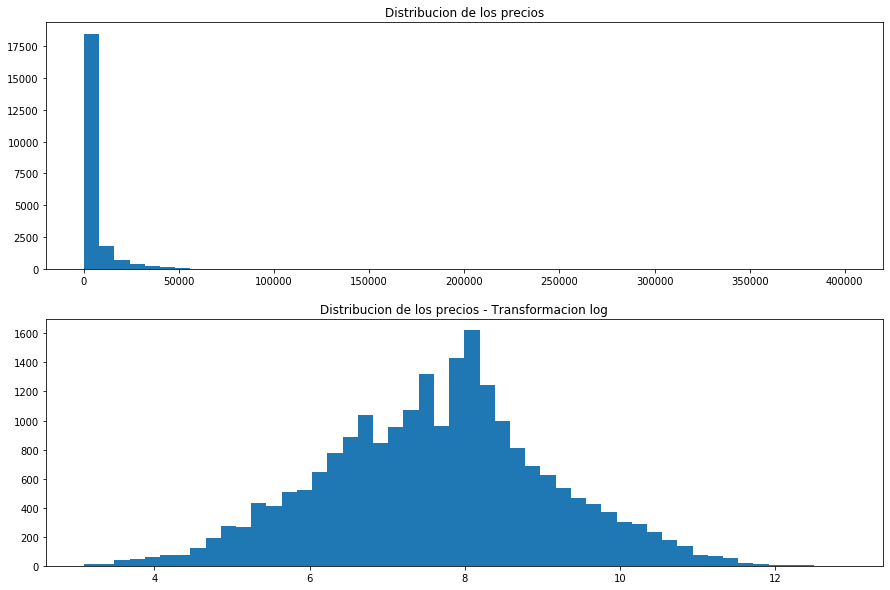

In [15]:
# Debido a que hay una alta concentracion de los prices en valores mas bajos, se aplica una transformacion 
# logaritmica para observar la distribucion

fig,(ax1,ax2) = plt.subplots(nrows = 2, ncols = 1, figsize= (15,10))
ax1.hist(df_final_discount['price'], bins = 50)
ax1.set_title('Distribucion de los precios')
ax2.hist(np.log(df_final_discount['price']), bins = 50)
ax2.set_title('Distribucion de los precios - Transformacion log')

En ambos graficos se ve que los precios de los distintos productos se encuentran en gran proporcion en los valores mas pequeños (alrededor de los 3000 es el punto de mayor concentracion) siendo los valores mas altos los menos comunes. 

**Consideracion: Estos graficos estan mirando todas las categorias, por lo que seria ideal ver esta misma distribucion para cada categoria**

C:\Users\elosasso\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning:

scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead

C:\Users\elosasso\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning:

Degrees of freedom <= 0 for slice

C:\Users\elosasso\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning:

invalid value encountered in double_scalars



Text(0.5, 1.0, 'Promedio de precios por categoria')

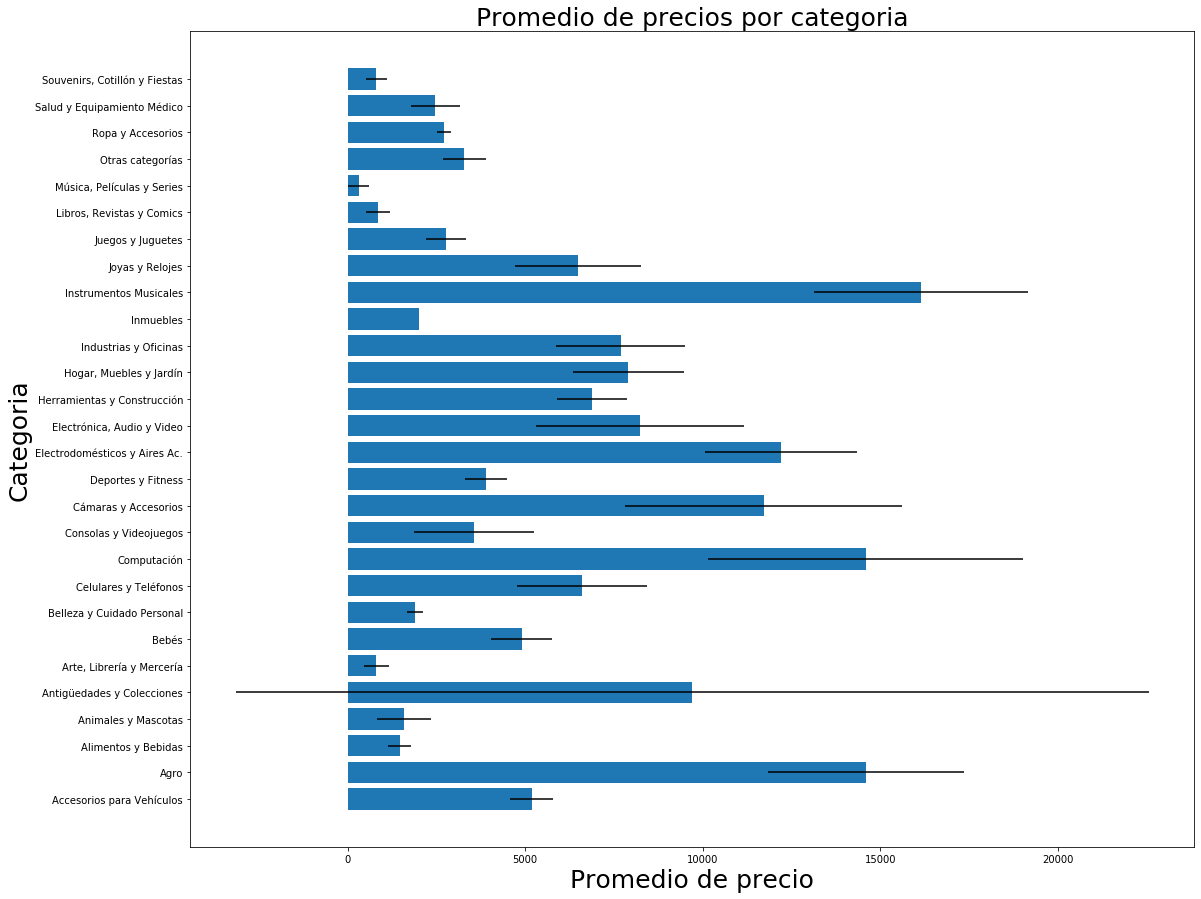

In [16]:
# Calculo intervalo de confianza de los precios para cada categoria para determinar si las diferencias
# entre estas es significativa

from scipy.stats import sem, t 
from scipy import mean
confidence = 0.95
confidence_intervals = {}

for categoria in df_final_discount.category.unique():
    min_max = []
    n = len(df_final_discount.loc[df_final_discount['category'] == categoria]['price'])
    mean_ = mean(df_final_discount.loc[df_final_discount['category'] == categoria]['price']) 
    std_err = sem(df_final_discount.loc[df_final_discount['category'] == categoria]['price'])
    h = std_err * t.ppf((1 + confidence) / 2, n - 1)
    start = mean_ - h
    stop = mean_ + h
    min_max.append(stop - start)
    confidence_intervals[categoria] = min_max
    
# Creo un dataframe auxiliar para el grafico agrupado por categoria, agregando la informacion del
# intervalo de confianza previamente calculado

plot = df_final_discount[['price','category']].groupby('category', as_index = False).mean()
plot['confidence_interval'] = plot['category'].apply(lambda x: confidence_intervals[x][0])

# Grafico los promedios de precios por categoria, sumando los intervalos de confianza para ver
# si las diferencias entre categorias son significativas

fig, ax = plt.subplots(figsize = (18,15))
ax.barh(plot['category'], plot['price'],xerr = plot['confidence_interval'])
ax.set_ylabel('Categoria', fontsize = 25)
ax.set_xlabel('Promedio de precio', fontsize = 25)
ax.set_title('Promedio de precios por categoria', fontsize = 25)

Se observa que existen notables diferencias en el promedio de del precio de los productos segun la categoria. 

En algunos casos, la diferencia no es significativa, como es el caso de las categorias *salud y equipamiento medico*, *Ropa y accesorios* y *otras categorias*. Pero si es evidente que, por ejemplo, el promedio de precios de los *celulares y telefonos* es mucho mayor al de *deportes y fitness*.

Viendo esta grafica, se entiende que las 3 categorias con los mayores precios son *Instrumentos Musicales*, *Computacion* (podria juntarse con *Electrodomesticos y Aires Ac* y *Camaras y Accesorios*) y *Agro*.

Las categorias con el menor precio son *Musica, Peliculas y Series*, *Souvenirs, Cotillon y Fiestas*, *Libros, Revistas y Comics* y *Arte, Libreria y Merceria*

Estos precios corresponden al precio final del producto, habiéndole aplicado un descuento. Puede resultar más interesante usar el valor del precio original del producto para entender las categorías con mayores descuentos. 

#### Construcción del porcentaje de descuento

In [21]:
# Creo el porcentaje de descuento 
df_final_discount['descuento'] = pd.to_numeric(((df_final_discount['original_price'] - df_final_discount['price'])/df_final_discount['original_price'])*100)

C:\Users\elosasso\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 1.0, 'Distribucion de descuentos total')

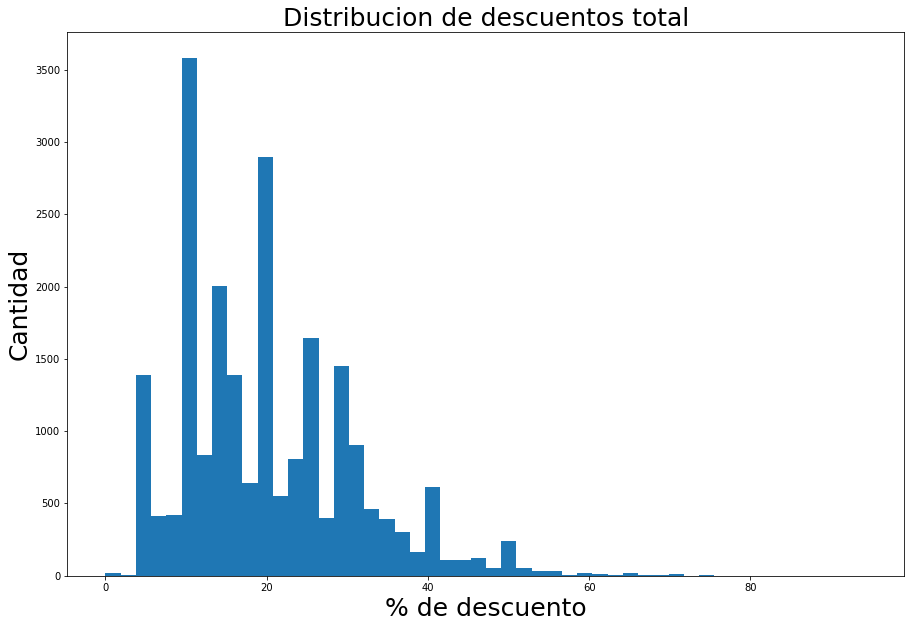

In [22]:
# Distribucion de los descuentos 
fig, ax = plt.subplots(figsize = (15,10))
ax.hist(df_final_discount['descuento'], bins = 50, density = False)
ax.set_xlabel('% de descuento', fontsize = 25)
ax.set_ylabel('Cantidad', fontsize = 25)
ax.set_title('Distribucion de descuentos total', fontsize = 25)

De nuevo, si bien la gráfica está armada para todas las categorias, se observa que en general los descuentos oscilan entre el 10% y el 40%.

Veamos entonces el promedio por categoría a ver si se mantiene la misma distribución o si existe alguna categoría que tenga más descuentos que otras.

C:\Users\elosasso\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning:

scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead

C:\Users\elosasso\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning:

Degrees of freedom <= 0 for slice

C:\Users\elosasso\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning:

invalid value encountered in double_scalars



Text(0.5, 1.0, 'Promedio de descuentos por categoria')

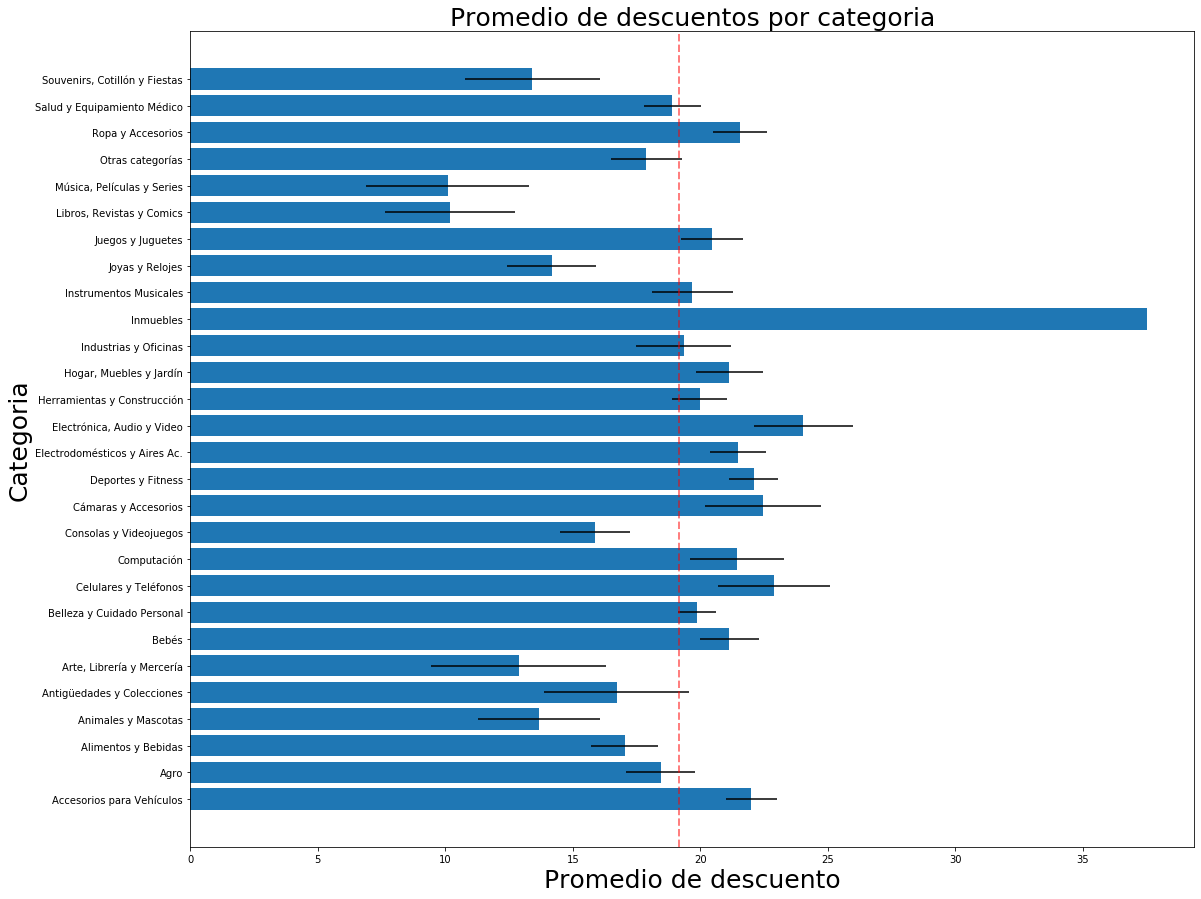

In [23]:
# Creo un dataframe auxiliar para el grafico agrupado por categoria, agregando la informacion del
# intervalo de confianza previamente calculado

confidence = 0.95
confidence_intervals = {}

for categoria in df_final_discount.category.unique():
    min_max = []
    n = len(df_final_discount.loc[df_final_discount['category'] == categoria]['descuento'])
    mean_ = mean(df_final_discount.loc[df_final_discount['category'] == categoria]['descuento']) 
    std_err = sem(df_final_discount.loc[df_final_discount['category'] == categoria]['descuento'])
    h = std_err * t.ppf((1 + confidence) / 2, n - 1)
    start = mean_ - h
    stop = mean_ + h
    min_max.append(stop - start)
    confidence_intervals[categoria] = min_max
    
# Creo un dataframe auxiliar para el grafico agrupado por categoria, agregando la informacion del
# intervalo de confianza previamente calculado

plot = df_final_discount[['descuento','category']].groupby('category', as_index = False).mean()
plot['confidence_interval'] = plot['category'].apply(lambda x: confidence_intervals[x][0])

# Grafico los promedios de precios por categoria, sumando los intervalos de confianza para ver
# si las diferencias entre categorias son significativas

fig, ax = plt.subplots(figsize = (18,15))
ax.barh(plot['category'], plot['descuento'],xerr = plot['confidence_interval'])
ax.axvline(np.mean(plot['descuento']), color='red', alpha=0.5, linestyle = '--', linewidth = 2)
ax.set_ylabel('Categoria', fontsize = 25)
ax.set_xlabel('Promedio de descuento', fontsize = 25)
ax.set_title('Promedio de descuentos por categoria', fontsize = 25)

El grafico anterior muestra lo que intuitivamente había comentado con el histograma. Se observa que en general, el promedio de los descuentos se encuentra en un poco menos del 20%

El intervalo de confianza me permite ver que en algunos casos, la diferencia entre dos categorías pareciera ser significativa pero no lo es.

A grandes rasgos, la mayoría de las categorías ofrecen alrededor del promedio de descuento, estando algunas por debajo del mismo.

Las que se encuentran por encima son aquellas que uno intuitivamente podría decir que son las que "más se compran", lo cual tendría sentido si uno observa las categorías

#### Cantidad de productos con descuento

Es importante tambien saber la cantidad de productos con descuentos que hay por cada categoría, a ver dónde es más común que existan

In [24]:
# Calculo la cantidad de productos por categoria

plt.figure(figsize = (15,10))
plot = df_final_discount[['category','currency_id']].groupby('category', as_index = False).count().sort_values(by = 'currency_id'
                                                                                                     ,ascending = False )
plot.rename(columns = {'currency_id':'q'}, inplace = True)

fig = px.bar(plot, x = 'category', y = 'q'
             ,color='q'
             ,height=600)
fig.update_layout(title = 'Cantidad de productos con descuento por categoria')
fig.show()

<Figure size 1080x720 with 0 Axes>

La gráfica anterior muestra la cantidad de productos con descuento que existe por cada categoría. 
Algo interesante para notar es que las primeras tres categorías que ofrecen mayor cantidad de productos con descuento son *Belleza y Cuidado Personal*, *Deportes y Fitness* y *Ropa y Accesorios*, las cuales se encuentran por debajo del promedio de descuento, previamente calculado.

Esto parece indicar que, a pesar de no otorgar grandes descuentos (grandes se entiende como superiores al promedio), son las que **más descuentos otorgan**.

En esta misma línea, se observa que algunas de las que más porcentaje de descuento otorgan, no son de las que más descuentos den. Por ejemplo, la categoría de *Agro* y *Música, Películas y Series* son de las que mayor descuento otorgaban, pero no tienen muchos productos.

In [25]:
# Encuentro la cantidad de productos con descuento por cada subcategoria 

plot = df_final_discount[['subcategory','currency_id']].groupby(['subcategory'], as_index = False).count()
plot.rename(columns = {'currency_id':'q'}, inplace = True)
plot = plot.sort_values(by= 'q', ascending = False)
plot.reset_index(drop = True)

# Como son muchas subcategorias, me quedo con aquellas que acumulan el 80% de los productos con descuento

plot['%'] = (plot['q']/sum(plot['q']))*100
plot['% acum'] = plot['%'].cumsum()
subplot = plot.loc[plot['% acum'] <= 80]

# Grafico
fig = px.bar(subplot, x = 'subcategory', y = 'q'
             ,color='q'
             ,height=600)
fig.update_layout(title = 'Cantidad de productos con descuento por subcategoria - 80% acumulado')
fig.show()  

Se observa que los productos que suelen tener descuento son las Zapatillas, seguidas por los Suplementos Alimenticios, los Shampoos, Suplementos deportivos, Mochilas, Eléctricos, Juegos de mesa y Videojuegos.

Estas categorías tienen más de 200 productos con descuento, siendo las primeras tres las que más tienen, con más de 800 productos con descuentos. 

#### Proporcion de productos con descuento que aceptan MercadoPago

In [26]:
plot = df_final_discount[['accepts_mercadopago','currency_id']].groupby('accepts_mercadopago', as_index = False).count()
plot.rename(columns = {'currency_id':'q'}, inplace = True)

fig = px.bar(plot, x = 'accepts_mercadopago', y = 'q')
fig.update_layout(title = 'Cantidad de productos que aceptan mercado pago')
fig.show()  

Evidentemente, todos los productos con descuento aceptan mercadopago

#### Distribución de los descuentos para cada grupo de sold quantity

In [28]:
fig = px.histogram(df_final_discount, x = 'descuento', color="sold_quantity", marginal="box")
fig.update_layout(title = 'Distribución de los descuentos según la condición del ítem')
fig.show()

#### Cantidad de productos vendidos con descuento

In [910]:
# Creo un diccionario con la tabla de conversion para obtener los rangos de cantidad de productos vendidos

dict_sold = {}
dict_sold['0'] = '0'
dict_sold['1'] = '1'
dict_sold['2'] = '2'
dict_sold['3'] = '3'
dict_sold['4'] = '4'
dict_sold['5'] = '5 - 25'
dict_sold['25'] = '26 - 50'
dict_sold['50'] = '51 - 100'
dict_sold['100'] = '101 - 150'
dict_sold['150'] = '151 - 200'
dict_sold['200'] = '201 - 250'
dict_sold['250'] = '251 - 500'
dict_sold['500'] = '501 - 5000'
dict_sold['5000'] = '5001 - 50000'
dict_sold['50000'] = '50001 - 500000'

# Guardo el diccionario

pickle.dump(dict_sold, open('dict_sold.sav', 'wb'))

# Creo una columna con el rango de productos vendidos

df_final_discount['sold_quantity_range'] = df_final_discount['sold_quantity'].apply(lambda x: dict_sold[str(x)])

C:\Users\elosasso\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0, 0.5, 'Cantidad de productos vendidos')

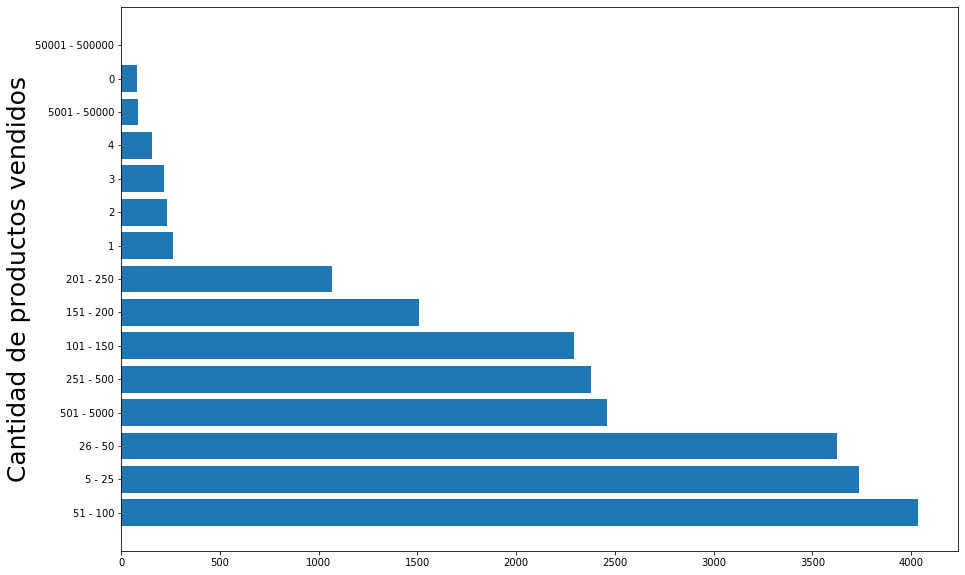

In [711]:
plot = df_final_discount.groupby('sold_quantity_range', as_index = False).agg({'currency_id':'count'}).sort_values(by = 'currency_id', ascending = False)
plot.rename(columns = {'currency_id':'q'}, inplace = True)
plot.reset_index(drop = True, inplace = True)

fig, ax = plt.subplots(figsize = (15,10))
ax.barh(plot['sold_quantity_range'], width = plot['q'])
ax.set_ylabel('Cantidad de productos vendidos', fontsize = '25')

Segun el grafico:

* La mayoria de los productos vendieron entre 5 y 100 unidades (agrupando los tres rangos con mayor cantidad de productos). Siendo la mayor cantidad vendida entre 51 y 100 unidades
* Muy pocos productos vendieron entre 5001 y 500000 unidades. Así como tampoco hay tantos productos con que no hayan vendido nada.

#### Cantidad vendida para productos con y sin descuento

Resulta interesante entender si el hecho de que un producto tenga descuenta cambia la cantidad de ventas. Por eso se analiza la cantidad vendida para ambos grupos de productos

In [911]:
df_final['sold_quantity_range'] = df_final['sold_quantity'].apply(lambda x: dict_sold[str(x)])
df_final['with_discount'] = df_final['original_price'].notna()

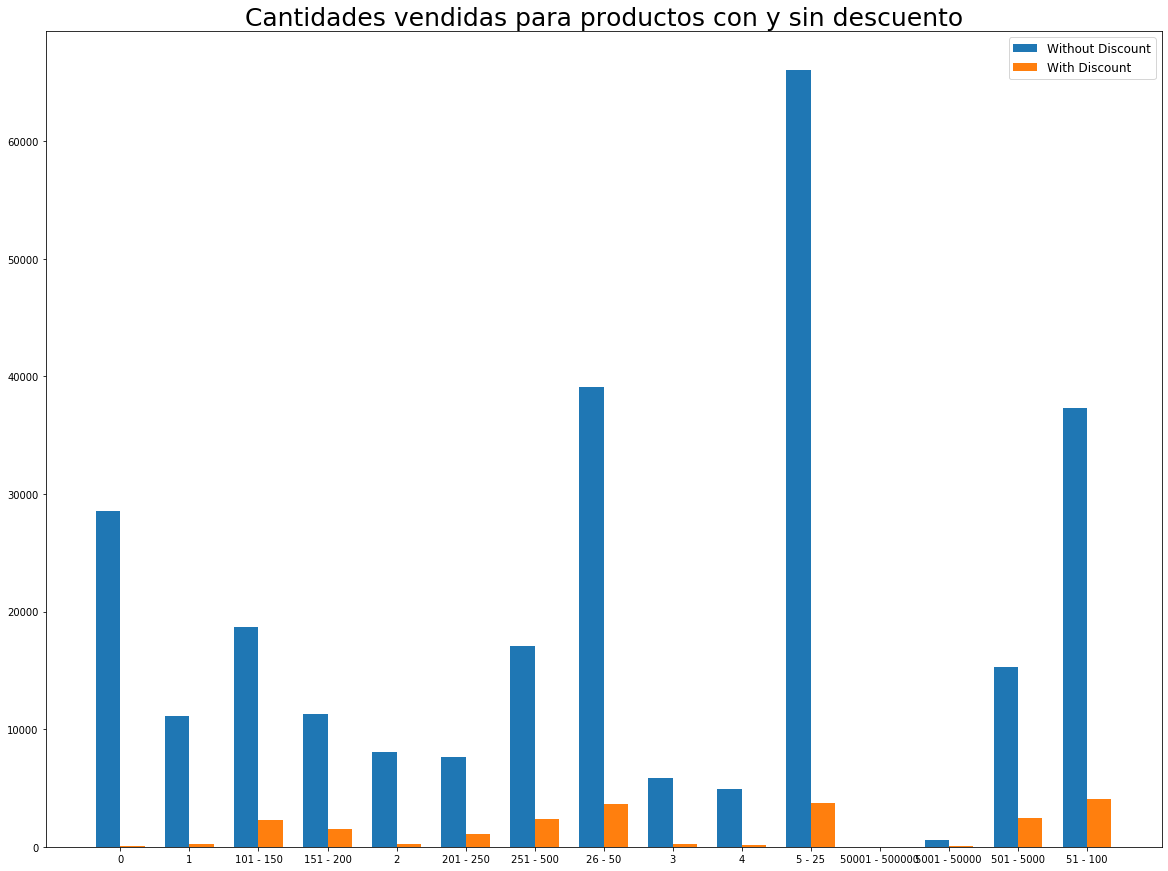

In [755]:
# Creo tabla agrupada con las cantidades vendidas 

plot = df_final.groupby(['with_discount','sold_quantity_range'], as_index = False).agg({'currency_id':'count'}).sort_values(by = 'currency_id', ascending = False)
plot.rename(columns = {'currency_id':'q'}, inplace = True)
plot.reset_index(drop = True, inplace = True)

# Creo las variables para el grafico
categorias =  np.array(plot[plot['with_discount'] == True].sort_values(by = 'sold_quantity_range')['sold_quantity_range'])
q_false = plot[plot['with_discount'] == False].sort_values(by = 'sold_quantity_range')['q']
q_true = plot[plot['with_discount'] == True].sort_values(by = 'sold_quantity_range')['q']

# Grafico 
x = np.arange(len(categorias))  
width = 0.35  

fig, ax = plt.subplots(figsize = (20,15))
rects1 = ax.bar(x - width/2, q_false, width, label='Without Discount')
rects2 = ax.bar(x + width/2, q_true, width, label='With Discount')

ax.set_title('Cantidades vendidas para productos con y sin descuento', fontsize = 25)
ax.set_xticks(x)
ax.set_xticklabels(categorias)
ax.legend(fontsize = 'large')

Se observa que la mayoría de los productos vendieron entre 5 y 25 unidades para el grupo de productos sin descuentos, mientras que para el caso de los productos sin descuento, la mayoría de los productos vendieron entre 51 y 100 unidades, con lo que pareciera ser que existe una relación entre el hecho de que un producto tenga descuento y la cantidad vendida

#### Cantidad de cuotas en los productos con descuento

Text(0.5, 0, 'Cantidad de cuotas')

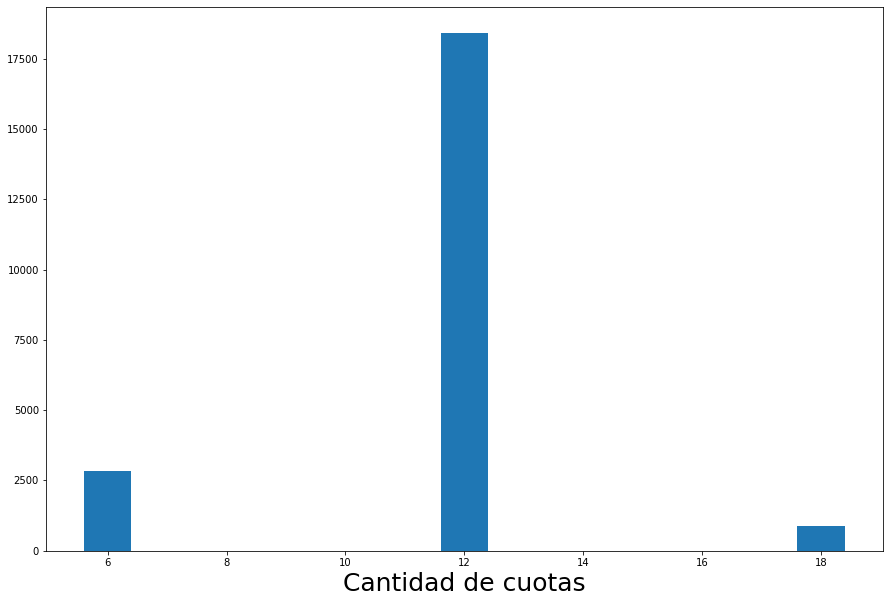

In [766]:
plot = pd.DataFrame(df_final_discount['q_installments'].value_counts())
plot.reset_index(drop = False, inplace = True)
plot.rename(columns = {'index':'q_cuotas'}, inplace = True)

plt.figure(figsize = (15,10))
plt.bar(x = plot['q_cuotas'], height = plot['q_installments'])
plt.xlabel('Cantidad de cuotas', fontsize = 25)

Se entiende en base al gráfico de arriba que la mayor parte de los productos con descuento cuenta además con 12 cuotas

#### Cantidad de productos vendidos para cada tipo de vendedor

Se quiere saber si algún tipo de vendedor en particular tiene más productos con descuento

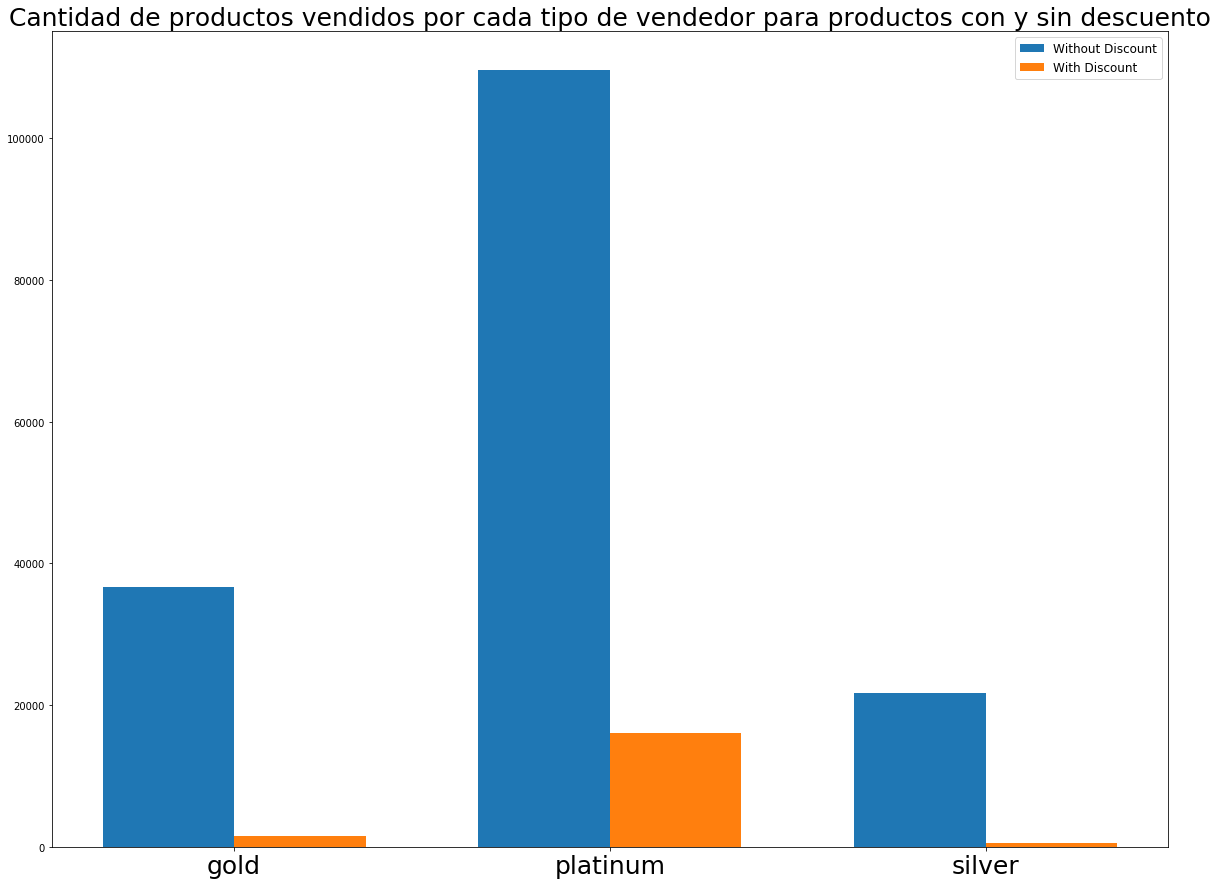

In [773]:
plot = df_final.groupby(['with_discount','power_seller_status'], as_index = False).agg({'currency_id':'count'})
plot.rename(columns = {'currency_id':'q'}, inplace = True)

# Creo las variables para el grafico
categorias =  np.array(plot[plot['with_discount'] == True]['power_seller_status'])
q_false = plot[plot['with_discount'] == False]['q']
q_true = plot[plot['with_discount'] == True]['q']

# Grafico 
x = np.arange(len(categorias))  
width = 0.35  

fig, ax = plt.subplots(figsize = (20,15))
rects1 = ax.bar(x - width/2, q_false, width, label='Without Discount')
rects2 = ax.bar(x + width/2, q_true, width, label='With Discount')

ax.set_title('Cantidad de productos vendidos por cada tipo de vendedor para productos con y sin descuento', fontsize = 25)
ax.set_xticks(x)
ax.set_xticklabels(categorias,fontsize = 25)
ax.legend(fontsize = 'large')

Se observa que no hay diferencia entre la cantidad de productos que hay para vender en cada tipo de vendedor. Los sellers platinum siguen teniendo la mayor cantidad de productos a la venta, ya sea con o sin descuento.

#### Cantidad de productos por provincia y ciudad

Text(0.5, 1.0, 'Cantidad de productos por provincia')

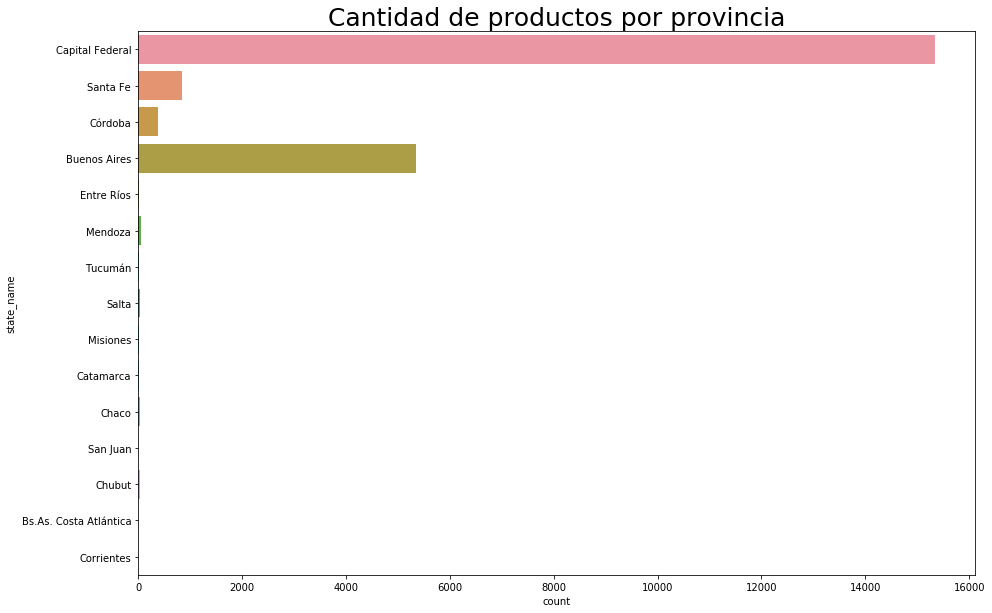

In [786]:
plt.figure(figsize = (15,10))
sns.countplot(y = df_final_discount.state_name)
plt.title('Cantidad de productos por provincia', fontsize = 25)

In [794]:
# Como son muchas subcategorias, me quedo con aquellas que acumulan el 80% de los productos con descuento

plot = df_final_discount.groupby(['city_name'], as_index = False).agg({'currency_id':'count'}).sort_values(by = 'currency_id', ascending = False)
plot.rename(columns = {'currency_id':'q'}, inplace = True)

plot['%'] = (plot['q']/sum(plot['q']))*100
plot['% acum'] = plot['%'].cumsum()
subplot = plot.loc[plot['% acum'] <= 80]

# Grafico
fig = px.bar(subplot, x = 'city_name', y = 'q'
             ,color='q'
             ,height=600)
fig.update_layout(title = 'Cantidad de productos con descuento por barrio - 80% acumulado')
fig.show()  

Se observa que la mayor cantidad de productos con descuentos a la venta se encuentran en la Capital Federal, seguido por Buenos Aires, Santa Fe y Córdoba.

En cuanto a los barrios con más productos con descuento, en primer lugar está la Capital, seguida de Belgrano, Caballito y Recoleta.

#### ¿Los rangos de cantidad de productos que más vendieron tienen una relación con la cantidad de cuotas?

Interesa entender si los mayores rangos de cantidades de productos vendidos (ej: 51-100) ofrecen además más o menos cuotas

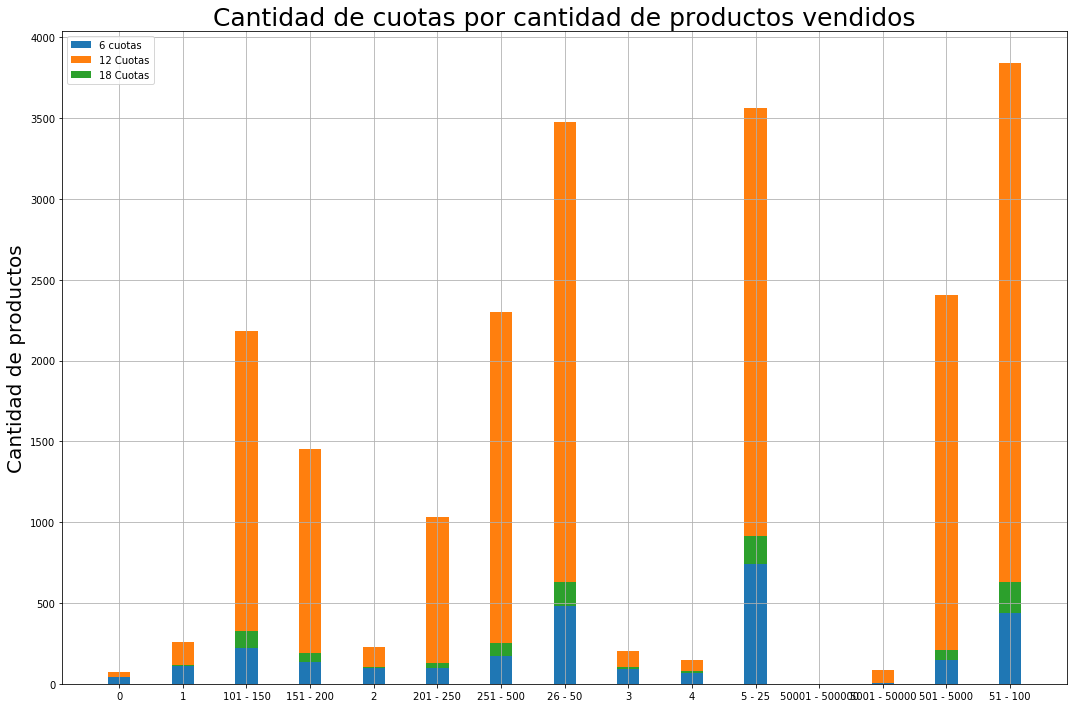

In [889]:
plot = df_final_discount.groupby(['sold_quantity_range','q_installments'], as_index = False).agg({'currency_id':'count'})
plot.rename(columns = {'currency_id':'q'}, inplace = True)

labels = plot['sold_quantity_range'].unique()
q_6cuotas  = [40,111,219,138,96,95,171,484,91,67,742,1,2,149, 436]
q_12cuotas = [34,145,1966,1315,129,936,2129,2996,114,80,2820,0,82,2255,3409]
q_18cuotas = [4,4,106,55,6,35,79,143,10,11,171,0,0,58,191]

fig, ax = plt.subplots(figsize = (18,12))
width = 0.35

ax.bar(labels, q_6cuotas, width, label ='6 cuotas')
ax.bar(labels, q_12cuotas, width, bottom = q_6cuotas,
       label='12 Cuotas')
ax.bar(labels, q_18cuotas, width, bottom = q_6cuotas,
       label='18 Cuotas')

ax.set_ylabel('Cantidad de productos', fontsize = 20)
ax.set_title('Cantidad de cuotas por cantidad de productos vendidos', fontsize = 25)
ax.legend(numpoints = 1)
plt.grid(True)
plt.show()

Se observa que, independientemente del rango de productos vendidos, en general todos mantienen la misma proporción de productos con 6,12 y 18 cuotas, siendo 12 la cantidad de cuotas más común.

#### Modo de compra para productos con y sin descuento

In [892]:
df_final.groupby(['with_discount','buying_mode'], as_index = False).agg({'currency_id':'count'})

with_discount buying_mode  currency_id
0          False  buy_it_now       248272
1          False  classified        23338
2           True  buy_it_now        22130
3           True  classified            1

En el caso de los productos con descuento, prácticamente el 100% de los productos se venden en la modalidad *buy_it_now* mientras que para los que no tienen descuento el 93% se vende en esta misma modalidad, dejando un 7% que se vende como *classified*. Vemos a qué categoría corresponden estos clasificados

In [927]:
# Categoria de productos con modo de compra clasificado

print(df_final[df_final['buying_mode'] == 'classified']['category'].unique())

['Autos, Motos y Otros' 'Inmuebles' 'Servicios']


Tiene sentido el resultado, se indica que aquellos productos que se compran de forma clasificada, son los inmuebles, autos y otros vehículos y servicios.

#### Distribución de los descuentos según la condición del producto

In [29]:
fig = px.histogram(df_final_discount, x = 'descuento', color="condition", marginal="rug")
fig.update_layout(title = 'Distribución de los descuentos según la condición del ítem')
fig.show()

Se observa que la mayor proporción de los productos son nuevos, siguiendo la distribución observada anteriormente, mientras que muy pocos productos usados tienen algún descuento. Esto puede entenderse como que los productos usados generalmente son vendidos por usuarios particulares, que de por si lo venden a precios medianamente razonables, y los casos donde se hace algún descuento es porque el vendedor está dispuesto a reducir el precio frente a una oferta.

#### Sold quantity para cada categoría

Se quiere ver si existen categorías que tiendan a vender más de un rango de *sold_quantity* que otras

In [51]:
plot = df_final.groupby(['category','sold_quantity'], as_index = False).agg({'title':'count'})
plot['sold_quantity'].unique()

array([    0,     1,     2,     3,     4,     5,    25,    50,   100,
         150,   200,   250,   500,  5000, 50000], dtype=int64)

In [52]:
import plotly.graph_objects as go
categorias = plot['category'].unique()
fig = go.Figure(data=[
    go.Bar(name='0', x=categorias, y=plot[plot['sold_quantity'] == 0]['title']),
    go.Bar(name='1', x=categorias, y=plot[plot['sold_quantity'] == 1]['title']),
    go.Bar(name='2', x=categorias, y=plot[plot['sold_quantity'] == 2]['title']),
    go.Bar(name='3', x=categorias, y=plot[plot['sold_quantity'] == 3]['title']),
    go.Bar(name='4', x=categorias, y=plot[plot['sold_quantity'] == 4]['title']),
    go.Bar(name='5', x=categorias, y=plot[plot['sold_quantity'] == 5]['title']),
    go.Bar(name='25', x=categorias, y=plot[plot['sold_quantity'] == 25]['title']),
    go.Bar(name='50', x=categorias, y=plot[plot['sold_quantity'] == 50]['title']),
    go.Bar(name='100', x=categorias, y=plot[plot['sold_quantity'] == 100]['title']),
    go.Bar(name='150', x=categorias, y=plot[plot['sold_quantity'] == 150]['title']),
    go.Bar(name='200', x=categorias, y=plot[plot['sold_quantity'] == 200]['title']),
    go.Bar(name='250', x=categorias, y=plot[plot['sold_quantity'] == 250]['title']),
    go.Bar(name='500', x=categorias, y=plot[plot['sold_quantity'] == 500]['title']),
    go.Bar(name='5000', x=categorias, y=plot[plot['sold_quantity'] == 5000]['title']),
    go.Bar(name='50000', x=categorias, y=plot[plot['sold_quantity'] == 50000]['title']),
    
])
# Change the bar mode
fig.update_layout(barmode='stack')
fig.show()

Se observa que en general, todas las categorías se encuentran balanceadas, a excepción de *Autos, Motos y Otros*, *Inmuebles* y *Servicios*, que en su mayoría tienen sold quantity igual a 0